This notebook provides a way to measure the importance of features in binary classification model.

## Numerical variables

In case with numerical variables we use Pearson correlation coefficient:
$$
\rho_{x,y}=\frac{\text{cov}(x,y)}{\sigma_x\sigma_y}
$$
where:
- $\rho_{x,y}$: Pearson correlation coefficient of variables $x$ and $y$
- $\text{cov}(x,y)$: Covariance of $x, y$
$$
\text{cov}(x,y)=\sum_i(x_i-\mu_x)(y_i-\mu_y)
$$
- $\mu_x, \mu_y$: mean values of $x,y$
- $\sigma_x, \sigma_y$: standard deviations of $x, y$
- $\sigma_x = \sqrt{\text{Var}(x)} = \sqrt{\text{Cov}(x,x)}$

The larger absolute value of $\rho_{x,y}$ the more relevent $x$ and $y$

## Categorical variables
For the categorical variables, there’s no Pearson correlation coefficient, but we can use another great discovery of Pearson, which is the **chi-square test**.

Let’s say we have a histogram of $N$ different categories with $O$ observation that sum up to $n$ and let’s say want to compare it with a theoretical histogram made by *probabilities* $p$. We can build a chi-square variable in this way:
$$
\chi^2=\sum_{i=1}^{N}\frac{(O_i-np_i)^2}{np_i}
$$

This variable is asymptotically distributed as a **chi-square distribution** with N-1 degrees of freedom.

If our variable is not correlated to the target, we expect that, for each one of its values, we get 50% zeroes and 50% ones on our dataset. This is a **theoretical histogram** we could expect to have if there’s no correlation, so a **one-tailed chi-square test** performed to check whether the real histogram is similar to this one, should give us a p-value equal to 1 (i.e. a low chi-square value) if our variable is not correlated to the target. On the contrary, a perfect predictor will push p-value towards lower values (i.e. higher chi-square values).

## Example in Python
Using Iris dataset with 1 - virginica, 0 - otherwise

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [42]:
# transform to dataframe
import pandas as pd
import numpy as np
iris_df = pd.DataFrame(
    data=np.concatenate([iris.data, iris.target.reshape(-1,1)], axis=1), 
    columns=iris.feature_names+['target']
)
iris_df['target'] = iris_df['target'].astype(int)
iris_df['Species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
# transform class to binary:
# 1 - virginica
# 0 - otherwise
iris_df['target'] = (iris_df['target'] > 1).astype(int)

In [45]:
# correlation coefficients
target_corr = np.abs(iris_df.corr()['target'])
target_corr

sepal length (cm)    0.638020
sepal width (cm)     0.130901
petal length (cm)    0.721102
petal width (cm)     0.769134
target               1.000000
Name: target, dtype: float64

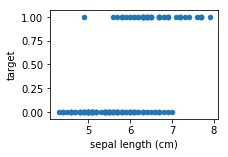

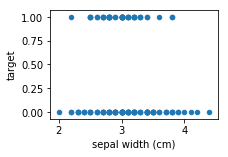

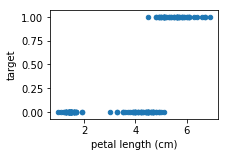

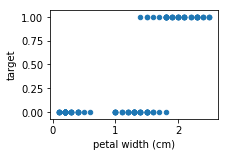

In [46]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
for col in iris.feature_names:
    iris_df.plot(x=col, y='target', kind='scatter', figsize=(3,2))
    plt.show()

In [48]:
iris_df.groupby(['Species', 'target']).size()

Species     target
setosa      0         50
versicolor  0         50
virginica   1         50
dtype: int64

In [58]:
import scipy.stats as scs

def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]
    cats1, cats2 = pd.Categorical(df_col1.unique()), pd.Categorical(df_col2.unique())

    def aux(is_cat1):
        return [sum(is_cat1 & (df_col2 == cat2))
                for cat2 in cats2]
    result = [aux(df_col1 == cat1)
              for cat1 in cats1]
    print(result)
    return scs.chi2_contingency(result)

In [59]:
chi_square_of_df_cols(iris_df, 'Species', 'target')

[[50, 0], [50, 0], [0, 50]]


(150.0, 2.678636961808087e-33, 2, array([[33.33333333, 16.66666667],
        [33.33333333, 16.66666667],
        [33.33333333, 16.66666667]]))

In [ ]:
scs.chi2_contingency(result)